In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [2]:
data = pd.read_sas('./data/LLCP2021.XPT')

In [3]:
data.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENM1',
       ...
       '_FRTRES1', '_VEGRES1', '_FRUTSU1', '_VEGESU1', '_FRTLT1A', '_VEGLT1A',
       '_FRT16A', '_VEG23A', '_FRUITE1', '_VEGETE1'],
      dtype='object', length=303)

In [4]:
data.describe()

,_STATE,FMONTH,DISPCODE,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHON1,LADULT1,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
count,438693.000000,438693.000000,438693.000000,4.386930e+05,117786.000000,117786.000000,30.0,117786.0,117786.0,117786.000000,...,4.386930e+05,4.386930e+05,3.876060e+05,3.785660e+05,438693.000000,438693.000000,4.386930e+05,4.386930e+05,4.386930e+05,4.386930e+05
mean,30.742155,6.405680,1118.189030,2.021006e+09,1.000017,1.000255,1.0,1.0,2.0,1.006291,...,8.835473e-01,8.629406e-01,1.783430e+02,2.715442e+02,2.270561,2.257184,9.949669e-01,9.926988e-01,1.265190e-01,1.516619e-01
std,15.334888,3.421731,38.575453,6.383751e+03,0.004121,0.015957,0.0,0.0,0.0,0.079067,...,3.207674e-01,3.439104e-01,6.912931e+02,1.036227e+03,2.485479,2.711460,7.076589e-02,8.513485e-02,3.472441e-01,3.785014e-01
min,1.000000,1.000000,1100.000000,2.021000e+09,1.000000,1.000000,1.0,1.0,2.0,1.000000,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000,1.000000,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
25%,20.000000,3.000000,1100.000000,2.021002e+09,1.000000,1.000000,1.0,1.0,2.0,1.000000,...,1.000000e+00,1.000000e+00,5.700000e+01,1.140000e+02,1.000000,1.000000,1.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79
50%,31.000000,6.000000,1100.000000,2.021004e+09,1.000000,1.000000,1.0,1.0,2.0,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+02,1.670000e+02,1.000000,1.000000,1.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79
75%,41.000000,9.000000,1100.000000,2.021008e+09,1.000000,1.000000,1.0,1.0,2.0,1.000000,...,1.000000e+00,1.000000e+00,2.000000e+02,2.290000e+02,2.000000,2.000000,1.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79
max,78.000000,12.000000,1200.000000,2.021039e+09,2.000000,2.000000,1.0,1.0,2.0,2.000000,...,1.000000e+00,1.000000e+00,1.980000e+04,3.960000e+04,9.000000,9.000000,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438693 entries, 0 to 438692
Columns: 303 entries, _STATE to _VEGETE1
dtypes: float64(298), object(5)
memory usage: 1014.1+ MB


In [6]:
data.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENM1',
       ...
       '_FRTRES1', '_VEGRES1', '_FRUTSU1', '_VEGESU1', '_FRTLT1A', '_VEGLT1A',
       '_FRT16A', '_VEG23A', '_FRUITE1', '_VEGETE1'],
      dtype='object', length=303)

In [7]:
data.select_dtypes(include=['object']).columns

Index(['IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'SEQNO'], dtype='object')

In [8]:
data['QSTVER'].value_counts(sort=False).rename({20: "cell phone single questionnaire", 21: "cell phone multiple questionnaire v1", 22: "cell phone multiple questionnaire v2", 23: "cell phone multiple questionnaire v3", 10: "landline single questionnaire", 11: "landline multiple questionnaire v1", 12: "landline multiple questionnaire v2", 13: "landline multiple questionnaire v3"})

landline single questionnaire            66467
cell phone single questionnaire         197277
landline multiple questionnaire v1       22612
landline multiple questionnaire v2       20622
cell phone multiple questionnaire v1     55822
cell phone multiple questionnaire v2     52307
landline multiple questionnaire v3        8085
cell phone multiple questionnaire v3     15501
Name: QSTVER, dtype: int64

In [9]:
a = data['QSTVER'].value_counts()
print(f"{'landline sum':14} {a[10]+a[11]+a[12]+a[13]}\n{'cell phone sum':14} {a[20]+a[21]+a[22]+a[23]}")

landline sum   117786
cell phone sum 320907


In [10]:
data.DISPCODE.value_counts(normalize=True).rename({1100: "completed interview", 1200: "partial completed interview"})

completed interview            0.81811
partial completed interview    0.18189
Name: DISPCODE, dtype: float64

In [11]:
data.CTELENM1.value_counts(dropna=False).rename(index=str).rename({'nan': 'cellphone', '1.0': 'correct number', '2.0': 'incorrect number'})

cellphone           320907
correct number      117784
incorrect number         2
Name: CTELENM1, dtype: int64

In [12]:
data[data.CTELENM1 == 2]

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
132142,23.0,1.0,b'03182021',b'03',b'18',b'2021',1100.0,b'2021000049',2.021000e+09,2.0,...,1.0,1.0,58.0,243.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
134418,23.0,10.0,b'10132021',b'10',b'13',b'2021',1100.0,b'2021002325',2.021002e+09,2.0,...,1.0,1.0,400.0,379.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79


In [13]:
data2 = data[data.CTELENM1 != 2] # dropping incorrect phone numbers
len(data.index)

438693

In [14]:
data2.PVTRESD1.value_counts(dropna=False).rename(index=str).rename({'nan': 'cellphone', '1.0': 'private res', '2.0': 'college housing'})

cellphone          320907
private res        117754
college housing        30
Name: PVTRESD1, dtype: int64

should drop missing values and such before this step

dropping columns related to state, time of interview, whether they are in college housing or not.

In [15]:
df = data2.drop(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'SEQNO', 'DISPCODE', '_PSU', 'CTELENM1', 
                'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1', 'SAFETIME', 'CTELNUM1', 'CELLFON5',
               'CADULT1', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'HHADULT', 'NUMPHON3','CPDEMO1B'], axis=1)
df.columns.size

277

In [16]:
di = df.corrwith(df['DIABETE4']).abs().sort_values().dropna()
di

NUMMEN      0.000064
_VEG23A     0.000306
FLSHTMY3    0.000532
_RFBMI5     0.000541
FRUIT2      0.000644
              ...   
_AGE_G      0.176549
CHOLMED3    0.209810
GENHLTH     0.213604
BPHIGH6     0.240133
DIABETE4    1.000000
Length: 264, dtype: float64

In [17]:
di.index.size

264

In [18]:
[i for i in df.columns if not i in di.index]

['DIABAGE3',
 'INSULIN1',
 'BLDSUGAR',
 'FEETCHK3',
 'DOCTDIAB',
 'CHKHEMO3',
 'FEETCHK',
 'EYEEXAM1',
 'DIABEYE',
 'DIABEDU',
 'TOLDCFS',
 'HAVECFS',
 'WORKCFS']

features that when trying to calculate correlation with Diabetes had value of "NaN

All features besides the bottom three CFS (Chronic Fatigue Syndrome) are diabetes questions that would have been asked after it was determined that the patient already most likely had diabetes

In [19]:
df[['TOLDCFS', 'HAVECFS', 'WORKCFS']].describe()

,TOLDCFS,HAVECFS,WORKCFS
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


Not one person called had CFS

In [20]:
len(df.index)

438691

In [21]:
for column in df:
    if(df[column].notna().sum() < 0.001*len(df.index)):
        print(f"{column:8} {df[column].notna().sum()}")

COLGSEX  30
TOLDCFS  0
HAVECFS  0
WORKCFS  0
TRETHEPC 162
PRIRHEPC 162
HAVEHEPC 162
MEDSHEPB 95
SIGMTES1 63
VCLNTES1 203
BLDSTFIT 390
SDNATES1 390


In [22]:
df2 = df.drop(['TOLDCFS', 'HAVECFS', 'WORKCFS'], axis = 1)
df2.columns.size

274

In [23]:
df2.columns

Index(['COLGSEX', 'NUMADULT', 'LANDSEX', 'NUMMEN', 'NUMWOMEN', 'RESPSLCT',
       'CELLSEX', 'SEXVAR', 'GENHLTH', 'PHYSHLTH',
       ...
       '_FRTRES1', '_VEGRES1', '_FRUTSU1', '_VEGESU1', '_FRTLT1A', '_VEGLT1A',
       '_FRT16A', '_VEG23A', '_FRUITE1', '_VEGETE1'],
      dtype='object', length=274)

In [24]:
df2[['SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2']].describe()

,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2
count,438691.000000,438687.000000,438688.000000,438689.000000,233413.000000,438689.000000,438686.000000,438689.000000,438689.000000
mean,1.535416,2.524764,63.190026,59.923413,54.000655,1.578873,1.942993,1.470789,1.258044
std,0.498745,1.082068,36.222119,37.472643,38.533457,0.892252,0.412581,1.128489,0.522586
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,25.000000,15.000000,10.000000,1.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,88.000000,88.000000,88.000000,1.000000,2.000000,1.000000,1.000000
75%,2.000000,3.000000,88.000000,88.000000,88.000000,2.000000,2.000000,1.000000,1.000000
max,2.000000,9.000000,99.000000,99.000000,99.000000,9.000000,9.000000,9.000000,9.000000


In [25]:
df2[['BPHIGH6', 'BPMEDS', 'TOLDHI3', 'CHOLMED3', 'CVDINFR4', 'MARITAL', 'EDUCA', 'INCOME3', 'PREGNANT']].describe()

,BPHIGH6,BPMEDS,TOLDHI3,CHOLMED3,CVDINFR4,MARITAL,EDUCA,INCOME3,PREGNANT
count,438689.000000,172132.000000,377856.000000,377121.000000,438689.000000,438686.000000,438686.000000,429844.000000,80672.000000
mean,2.238438,1.187862,1.647765,1.722198,1.979719,2.397870,5.035267,23.222362,2.020317
std,1.053717,0.507138,0.713508,0.616784,0.470205,1.825153,1.047852,33.568246,0.594835
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,4.000000,6.000000,2.000000
50%,3.000000,1.000000,2.000000,2.000000,2.000000,1.000000,5.000000,8.000000,2.000000
75%,3.000000,1.000000,2.000000,2.000000,2.000000,3.000000,6.000000,10.000000,2.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,99.000000,9.000000


In [26]:
# _EDUCAG is better than EDUCA
# _INCOMG1 is better than INCOME3

In [27]:
df2[['WEIGHT2', 'HEIGHT3', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'USENOW3']].describe()

,WEIGHT2,HEIGHT3,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,USENOW3
count,426875.000000,425732.000000,421848.000000,420682.000000,419905.000000,418838.000000,417459.000000,167453.000000,416702.000000
mean,828.576689,809.566046,1.932075,1.864054,1.973032,1.947655,1.641687,2.458039,2.961474
std,2356.011913,1569.334861,0.589893,0.535093,0.353299,0.449092,0.721080,0.888965,0.392549
min,50.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,150.000000,504.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000
50%,180.000000,507.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000
75%,220.000000,511.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000
max,9999.000000,9999.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [28]:
df2[['ECIGNOW1', 'ALCDAY5', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS', 'FLUSHOT7', 'PNEUVAC4']].describe()

,ECIGNOW1,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,PNEUVAC4
count,415666.000000,414204.000000,210421.000000,209824.000000,209262.000000,411043.000000,409604.000000
mean,3.145523,526.709969,4.207878,66.566232,6.056967,1.536477,2.046879
std,0.599657,355.293681,12.773189,36.470593,14.864479,0.783637,1.577978
min,1.000000,101.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,202.000000,1.000000,30.000000,1.000000,1.000000,1.000000
50%,3.000000,230.000000,2.000000,88.000000,2.000000,1.000000,2.000000
75%,3.000000,888.000000,3.000000,88.000000,4.000000,2.000000,2.000000
max,9.000000,999.000000,99.000000,99.000000,99.000000,9.000000,9.000000


In [29]:
# ify but probably don't use
df2[['RENTHOM1', 'CHILDREN']].describe()

,RENTHOM1,CHILDREN
count,438683.000000,432556.000000
mean,1.413032,66.086343
std,0.932789,37.644673
min,1.000000,1.000000
25%,1.000000,5.000000
50%,1.000000,88.000000
75%,2.000000,88.000000
max,9.000000,99.000000


In [30]:
# _HLTHPLN in stead of PRIMINSR

In [31]:
df2[['_HLTHPLN', 'EMPLOY1', 'HIVTST7', 'FRUIT2', 'FRUITJU2', 'FVGREEN1', 'FRENCHF1']].describe()

,_HLTHPLN,EMPLOY1,HIVTST7,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1
count,438691.000000,435103.000000,408540.000000,404516.000000,402929.000000,401696.000000,400580.000000
mean,1.370172,3.803529,1.954519,193.632880,371.472066,243.894398,302.142591
std,1.566499,2.873349,1.302991,138.318239,186.413754,136.673113,137.383621
min,1.000000,1.000000,1.000000,101.000000,101.000000,101.000000,101.000000
25%,1.000000,1.000000,1.000000,101.000000,202.000000,201.000000,202.000000
50%,1.000000,2.000000,2.000000,201.000000,304.000000,203.000000,301.000000
75%,1.000000,7.000000,2.000000,205.000000,555.000000,302.000000,305.000000
max,9.000000,9.000000,9.000000,999.000000,999.000000,999.000000,999.000000


In [32]:
# small sample example data

In [33]:
data2 = df2[['_AGEG5YR', 'SEXVAR','_RFCHOL3', '_CHOLCH3', '_BMI5','SMOKE100', '_MICHD', '_TOTINDA', '_FRTLT1A', '_VEGLT1A', '_RFHYPE6', '_EDUCAG', '_INCOMG1', '_RFDRHV7','DIFFWALK', 'DIABETE4']]
data2.describe()

,_AGEG5YR,SEXVAR,_RFCHOL3,_CHOLCH3,_BMI5,SMOKE100,_MICHD,_TOTINDA,_FRTLT1A,_VEGLT1A,_RFHYPE6,_EDUCAG,_INCOMG1,_RFDRHV7,DIFFWALK,DIABETE4
count,438691.000000,438691.000000,377541.000000,438691.000000,391839.000000,417459.000000,434056.000000,438691.000000,438691.000000,438691.000000,438691.000000,438691.000000,438691.000000,438691.000000,420682.000000,438688.000000
mean,7.726019,1.535416,1.463001,1.716965,2855.227657,1.641687,1.918623,1.260892,2.270564,2.257190,1.427244,3.068198,5.339904,1.692551,1.864054,2.761945
std,3.645934,0.498745,0.845037,2.036558,655.195952,0.721080,0.273413,0.557933,2.485483,2.711465,0.699127,1.047387,2.391909,2.163303,0.535093,0.743412
min,1.000000,1.000000,1.000000,1.000000,1200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,1.000000,1.000000,1.000000,2414.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,3.000000
50%,8.000000,2.000000,1.000000,1.000000,2744.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,1.000000,2.000000,3.000000
75%,11.000000,2.000000,2.000000,1.000000,3174.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,4.000000,7.000000,1.000000,2.000000,3.000000
max,14.000000,2.000000,9.000000,9.000000,9933.000000,9.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [34]:
# _AGEG5YR Reported age in five-year age categories calculated variable
# SEXVAR reported sex
# _RFCHOL3 High Cholesterol or not
# _CHOLCH3 Cholesterol check within past five years
# _BMI5 body mass index 2 decimal places
# SMOKE100 smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
# _MICHD reported having coronary heart disease (CHD) or myocardial infarction (MI)
# _TOTINDA reported doing physical activity or exercise during the past 30 days other than their regular job
# _FRTLT1A consume Fruit 1 or more times per day
# _VEGLT1A Consume Vegetables 1 or more times per day
# _RFHYPE6 been told they have high blood pressure by a doctor, nurse, or other health professional
# _EDUCAG level of education completed
# _INCOMG1 Computed income categories 1-7(<15000, >200000), 9 (don't know)
# _RFDRHV7 Heavy drinkers (adult men having more than 14 drinks/week and adult women having more than 7 drinks/week)
# DIFFWALK have serious difficulty walking or climbing stairs?
# DIABETE4 have diabetes

In [35]:
df2[['FRUIT2', 'FRUITJU2']].head(10)

,FRUIT2,FRUITJU2
0,101.0,555.0
1,101.0,555.0
2,101.0,555.0
3,203.0,205.0
4,101.0,555.0
5,202.0,555.0
6,312.0,301.0
7,204.0,555.0
8,202.0,101.0
9,101.0,555.0


<AxesSubplot:>

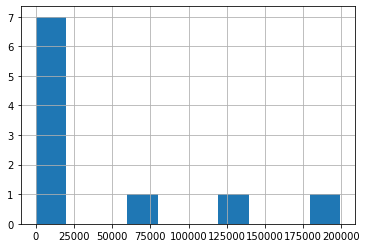

In [36]:
df2['FRUIT2'].value_counts(bins=10).hist(bins=10)

In [37]:
s = df2['FRUIT2'].value_counts(sort=False, bins=40)
s[s!=0]

(100.101, 123.45]    198508
(123.45, 145.9]         614
(145.9, 168.35]          37
(168.35, 190.8]          11
(190.8, 213.25]      123300
(213.25, 235.7]         555
(235.7, 258.15]          23
(258.15, 280.6]           5
(280.6, 303.05]       21571
(303.05, 325.5]       32789
(325.5, 347.95]        5514
(347.95, 370.4]         347
(370.4, 392.85]          64
(392.85, 415.3]         315
(550.0, 572.45]       11087
(774.5, 796.95]        8346
(976.55, 999.0]        1430
Name: FRUIT2, dtype: int64

<AxesSubplot:>

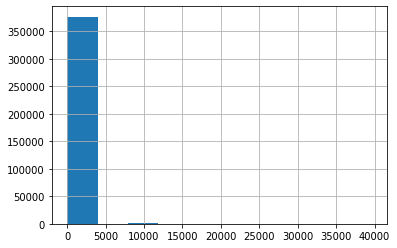

In [38]:
df2['_VEGESU1'].hist()

In [39]:
df2['_VEGESU1'].value_counts(sort=False, bins=20)

(-39.601, 1980.0]     375194
(1980.0, 3960.0]        1054
(3960.0, 5940.0]         116
(5940.0, 7920.0]         265
(7920.0, 9900.0]          44
(9900.0, 11880.0]       1274
(11880.0, 13860.0]        31
(13860.0, 15840.0]        16
(15840.0, 17820.0]        10
(17820.0, 19800.0]        59
(19800.0, 21780.0]       451
(21780.0, 23760.0]         4
(23760.0, 25740.0]         2
(25740.0, 27720.0]         0
(27720.0, 29700.0]         9
(29700.0, 31680.0]        31
(31680.0, 33660.0]         0
(33660.0, 35640.0]         1
(35640.0, 37620.0]         0
(37620.0, 39600.0]         3
Name: _VEGESU1, dtype: int64

In [40]:
d = df2['_VEGESU1']
d[d>37520.0]

92426     39600.0
171630    38700.0
256347    39600.0
Name: _VEGESU1, dtype: float64

In [41]:
df2['GRENDA1_'].value_counts(sort=False, bins=25)

(-9.901, 396.0]     389919
(396.0, 792.0]        2868
(792.0, 1188.0]        116
(1188.0, 1584.0]       180
(1584.0, 1980.0]         7
(1980.0, 2376.0]        71
(2376.0, 2772.0]        33
(2772.0, 3168.0]       401
(3168.0, 3564.0]         8
(3564.0, 3960.0]         3
(3960.0, 4356.0]         4
(4356.0, 4752.0]         2
(4752.0, 5148.0]        13
(5148.0, 5544.0]         1
(5544.0, 5940.0]         0
(5940.0, 6336.0]         2
(6336.0, 6732.0]         2
(6732.0, 7128.0]         2
(7128.0, 7524.0]         0
(7524.0, 7920.0]         2
(7920.0, 8316.0]         2
(8316.0, 8712.0]         0
(8712.0, 9108.0]         8
(9108.0, 9504.0]         1
(9504.0, 9900.0]       796
Name: GRENDA1_, dtype: int64

In [42]:
d2 = df2['GRENDA1_']
d2[d2<200].value_counts(sort=False, bins=25)

(-0.188, 7.48]      60010
(7.48, 14.96]       55168
(14.96, 22.44]      10371
(22.44, 29.92]      51691
(29.92, 37.4]        7646
(37.4, 44.88]       51476
(44.88, 52.36]       8907
(52.36, 59.84]      28583
(59.84, 67.32]       7045
(67.32, 74.8]       19050
(74.8, 82.28]         176
(82.28, 89.76]       5959
(89.76, 97.24]        466
(97.24, 104.72]     68191
(104.72, 112.2]        21
(112.2, 119.68]       157
(119.68, 127.16]        2
(127.16, 134.64]      101
(134.64, 142.12]        1
(142.12, 149.6]       302
(149.6, 157.08]        70
(157.08, 164.56]        1
(164.56, 172.04]      100
(172.04, 179.52]        2
(179.52, 187.0]        10
Name: GRENDA1_, dtype: int64

In [43]:
# CVDCRHD4 target var (angina or coronary heart disease)
# CVDSTRK3 target var (stroke)
# ASTHMA3 target var (asthma); ASTHNOW if they still have asthma
# CHCSCNCR target var (skin cancer)
# CHCOCNCR target var (other cancer)
# CHCCOPD3 target var (chronic obstructive pulmonary disease)
# ADDEPEV3 target var (depressive disorder)
# CHCKDNY2 target var (kidney disease)
# DIABETE4 target var (diabetes); if not target var, DIABAGE3
# HAVARTH5 target var (arthritis); if not target var, ARTHEXER, ARTHEDU, LMTJOIN3, ARTHDIS2, JOINPAI2
# DEAF target var (deaf or hearing difficuly)
# BLIND target var (blind or difficulty seeing)

In [44]:
df2['GENHLTH'].describe()

count    438687.000000
mean          2.524764
std           1.082068
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           9.000000
Name: GENHLTH, dtype: float64

In [45]:
df2['GENHLTH'] = df2['GENHLTH'].replace(7,3)
df2['GENHLTH'] = df2['GENHLTH'].replace(9,3)
df2['GENHLTH'] = df2['GENHLTH'].fillna(3)
df2['GENHLTH'].describe()

count    438691.000000
mean          2.512536
std           1.048840
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: GENHLTH, dtype: float64

In [46]:
df2['PHYSHLTH'] = df2['PHYSHLTH'].replace(88,0)
df2['PHYSHLTH'] = df2['PHYSHLTH'].replace(77,0)
df2['PHYSHLTH'] = df2['PHYSHLTH'].replace(99,0)
df2['PHYSHLTH'] = df2['PHYSHLTH'].fillna(0)
df2['PHYSHLTH'].describe()

count    438691.000000
mean          3.713277
std           8.280845
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: PHYSHLTH, dtype: float64

In [47]:
df2['MENTHLTH'] = df2['MENTHLTH'].replace(88,0)
df2['MENTHLTH'] = df2['MENTHLTH'].replace(77,0)
df2['MENTHLTH'] = df2['MENTHLTH'].replace(99,0)
df2['MENTHLTH'] = df2['MENTHLTH'].fillna(0)
df2['MENTHLTH'].describe()

count    438691.000000
mean          4.030133
std           8.109885
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: MENTHLTH, dtype: float64

In [48]:
df2['POORHLTH'] = df2['POORHLTH'].replace(88,0)
df2['POORHLTH'] = df2['POORHLTH'].replace(77,0)
df2['POORHLTH'] = df2['POORHLTH'].replace(99,0)
df2['POORHLTH'] = df2['POORHLTH'].fillna(0)
df2['POORHLTH'].describe()

count    438691.000000
mean          2.708070
std           7.011317
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          30.000000
Name: POORHLTH, dtype: float64

In [49]:
type(df2)

pandas.core.frame.DataFrame

In [50]:
df2['_EDUCAG'] = df2['_EDUCAG'].replace(1,'No_HS')
df2['_EDUCAG'] = df2['_EDUCAG'].replace(2,'HS')
df2['_EDUCAG'] = df2['_EDUCAG'].replace(3,'ATTEND_COLLEGE')
df2['_EDUCAG'] = df2['_EDUCAG'].replace(4,'GRADUATE_COLLEGE')
df2['_EDUCAG'] = df2['_EDUCAG'].replace(9,'No_HS')
df2['_EDUCAG'] = df2['_EDUCAG'].fillna('No_HS')
df2['_EDUCAG'].describe()

count               438691
unique                   4
top       GRADUATE_COLLEGE
freq                178576
Name: _EDUCAG, dtype: object

In [51]:
edu=pd.get_dummies(df2['_EDUCAG'], prefix='EDU')
edu.columns

Index(['EDU_ATTEND_COLLEGE', 'EDU_GRADUATE_COLLEGE', 'EDU_HS', 'EDU_No_HS'], dtype='object')

In [52]:
df3 = pd.concat([df2, edu], 1)

/tmp/ipykernel_123585/2884158544.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df3 = pd.concat([df2, edu], 1)


In [53]:
df3[['_HLTHPLN','POORHLTH', 'EDU_ATTEND_COLLEGE', 'EDU_GRADUATE_COLLEGE', 'EDU_HS', 'EDU_No_HS']].describe()

,_HLTHPLN,POORHLTH,EDU_ATTEND_COLLEGE,EDU_GRADUATE_COLLEGE,EDU_HS,EDU_No_HS
count,438691.000000,438691.000000,438691.000000,438691.000000,438691.000000,438691.000000
mean,1.370172,2.708070,0.273774,0.407066,0.254266,0.064895
std,1.566499,7.011317,0.445895,0.491288,0.435448,0.246341
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,9.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
# has a personal doctor
df3['has_doc'] = df3['PERSDOC3']
df3['has_doc'] = df3['has_doc'].replace(2,1)
df3['has_doc'] = df3['has_doc'].replace(3,0)
df3['has_doc'] = df3['has_doc'].replace(7,0)
df3['has_doc'] = df3['has_doc'].replace(9,0)
df3['has_doc'] = df3['has_doc'].fillna(0)
df3['has_doc'].describe()

count    438691.000000
mean          0.871402
std           0.334755
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: has_doc, dtype: float64

In [55]:
df3.drop(columns=['PERSDOC3'])

,COLGSEX,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,CELLSEX,SEXVAR,GENHLTH,PHYSHLTH,...,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,EDU_ATTEND_COLLEGE,EDU_GRADUATE_COLLEGE,EDU_HS,EDU_No_HS,has_doc
0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,5.0,20.0,...,1.0,1.0,1.0,5.397605e-79,5.397605e-79,0,0,1,0,1.0
1,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,3.0,0.0,...,1.0,1.0,1.0,5.397605e-79,5.397605e-79,0,1,0,0,1.0
2,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,2.0,0.0,...,2.0,1.0,1.0,5.397605e-79,5.397605e-79,0,0,1,0,1.0
3,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,2.0,0.0,...,1.0,1.0,1.0,5.397605e-79,5.397605e-79,0,0,1,0,1.0
4,NaN,2.0,NaN,1.0,1.0,1.0,NaN,1.0,5.0,30.0,...,1.0,1.0,1.0,5.397605e-79,5.397605e-79,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438688,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,0.0,...,1.0,1.0,1.0,5.397605e-79,5.397605e-79,0,0,1,0,0.0
438689,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0.0,...,1.0,1.0,1.0,5.397605e-79,5.397605e-79,0,0,1,0,1.0
438690,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,0.0,...,1.0,1.0,1.0,5.397605e-79,5.397605e-79,0,1,0,0,1.0
438691,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,0.0,...,1.0,1.0,1.0,5.397605e-79,5.397605e-79,0,0,1,0,1.0
